In [1]:
from datetime import datetime, timedelta
import xarray as xr
from xhistogram.xarray import histogram
import pandas as pd

# We want to make an aggregate of the following set of forecst files, which overlap with 24 hours

In [2]:
u = 'https://thredds.met.no/thredds/dodsC/ww3_4km_archive_files/%Y/%m/%d/ww3_4km_%Y%m%dT00Z.nc'

In [3]:
def open_mfdataset_overlap(url_base, time_series, timedim='time'):
    urls = [t.strftime(u) for t in time_series]
    time_step = time_series[1] - time_series[0]
    print('Opening individual URLs...')
    datasets = [xr.open_dataset(u, chunks='auto').sel({timedim: slice(t, t+time_step-timedelta(seconds=1))})
                for u,t in zip(urls, time_series)]
    print('Concatenating...')    
    ds = xr.concat(datasets, dim=timedim,
                   compat='override', combine_attrs='override', join='override', coords='all')
    return ds

# Making an aggregate for 15 days

In [4]:
%%time
ds = open_mfdataset_overlap(u, pd.date_range('2023-01-01', '2023-01-15'))
print(ds)

Opening individual URLs...
Concatenating...
<xarray.Dataset>
Dimensions:                  (rlat: 1026, rlon: 624, time: 360)
Coordinates:
  * rlat                     (rlat) float64 -14.35 -14.31 -14.27 ... 26.61 26.65
  * rlon                     (rlon) float64 5.53 5.57 5.61 ... 30.37 30.41 30.45
  * time                     (time) datetime64[ns] 2023-01-01 ... 2023-01-15T...
Data variables: (12/46)
    forecast_reference_time  (time) datetime64[ns] 2023-01-01 ... 2023-01-15
    rotated_pole             (time) int8 -127 -127 -127 -127 ... -127 -127 -127
    MAPSTA                   (time, rlat, rlon) int16 dask.array<chunksize=(24, 1026, 624), meta=np.ndarray>
    cha                      (time, rlat, rlon) float32 dask.array<chunksize=(24, 921, 559), meta=np.ndarray>
    dir                      (time, rlat, rlon) float32 dask.array<chunksize=(24, 921, 559), meta=np.ndarray>
    dp                       (time, rlat, rlon) float32 dask.array<chunksize=(24, 921, 559), meta=np.ndarray>

# Plotting time series of wind speed at a position

CPU times: user 540 ms, sys: 40.9 ms, total: 581 ms
Wall time: 787 ms


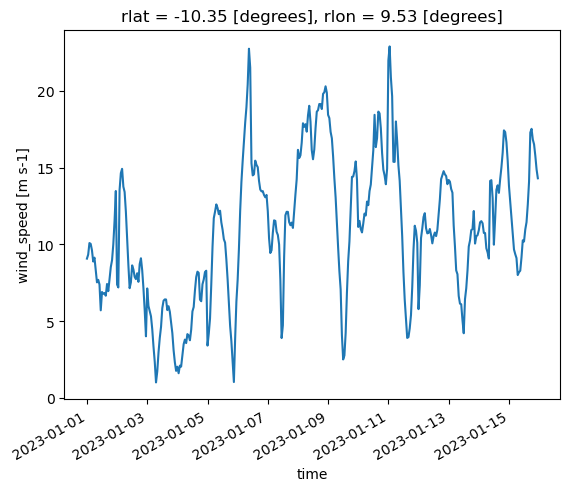

In [5]:
%%time
ds.isel({'rlon': 100, 'rlat': 100}).ff.plot()